### 1) Description of Data

    - instant: record index
	- dteday : date
	- season : season (1:winter, 2:spring, 3:summer, 4:fall)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
	- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

### 2) General Informations about Bike

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.compose import ColumnTransformer

In [10]:
bike_df = pd.read_csv("C:/Users/angel/Downloads/Statistics For machine Learning/hour.csv")

print(bike_df.head())

   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  


In [16]:
# Checking the null values

print(bike_df.notna().sum())

instant       17379
dteday        17379
season        17379
yr            17379
mnth          17379
hr            17379
holiday       17379
weekday       17379
workingday    17379
weathersit    17379
temp          17379
atemp         17379
hum           17379
windspeed     17379
casual        17379
registered    17379
cnt           17379
dtype: int64


In [21]:
#Informations values
print(bike_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None


In [9]:
#Statistics values
print(bike_df["cnt"].describe())

# Variance values
print("La variance est de :",np.var(bike_df["cnt"]))


count    17379.000000
mean       189.463088
std        181.387599
min          1.000000
25%         40.000000
50%        142.000000
75%        281.000000
max        977.000000
Name: cnt, dtype: float64
La variance est de : 32899.56793087754


### 3) Cleaned up data

In [11]:
# Convert in date

bike_df["dteday"] = pd.to_datetime(bike_df["dteday"], format='%Y-%m-%d')

In [13]:
# Rename the column if necessary
bike_df.rename(columns={"dteday": "Date"}, inplace=True)
bike_df.rename(columns={"hr": "Time"}, inplace=True)
print(bike_df["Date"].info())

<class 'pandas.core.series.Series'>
RangeIndex: 17379 entries, 0 to 17378
Series name: Date
Non-Null Count  Dtype         
--------------  -----         
17379 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 135.9 KB
None


### 4) Visualization of bike data

Text(0.5, 1.0, 'Heatmap Bike')

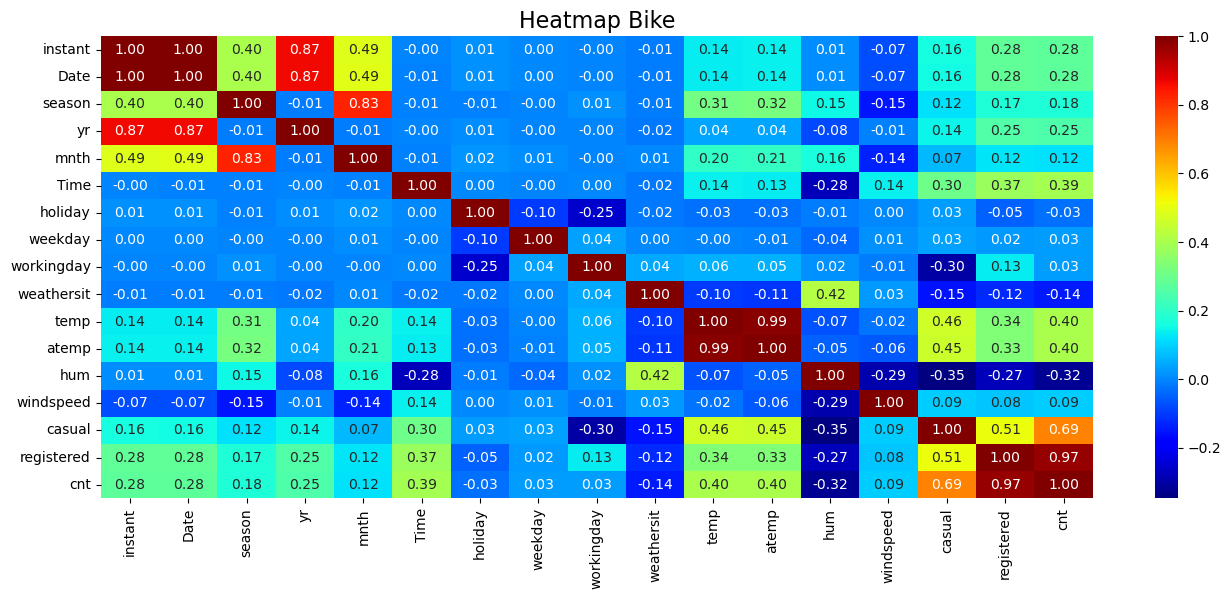

In [35]:
#Heatmap

num_df = bike_df.select_dtypes(include=["number"])

corr_matrix = bike_df.corr()

# Plot a heatmap
plt.figure(figsize=(16, 6))
sns.heatmap(corr_matrix, annot=True, cmap="jet", fmt=".2f", cbar=True)
plt.title("Heatmap Bike",fontsize=16)

C:\Users\angel\anaconda3\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1345: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


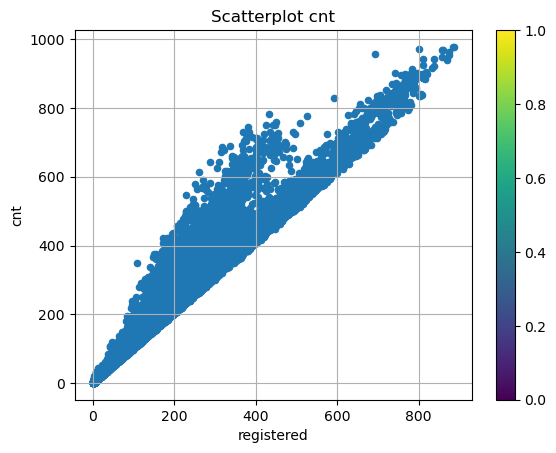

In [103]:
# Scatterpplot

bike_df.plot(kind="scatter", x="registered",y="cnt",grid=True,cmap="jet",colorbar =True)
plt.title("Scatterplot cnt")

plt.show()

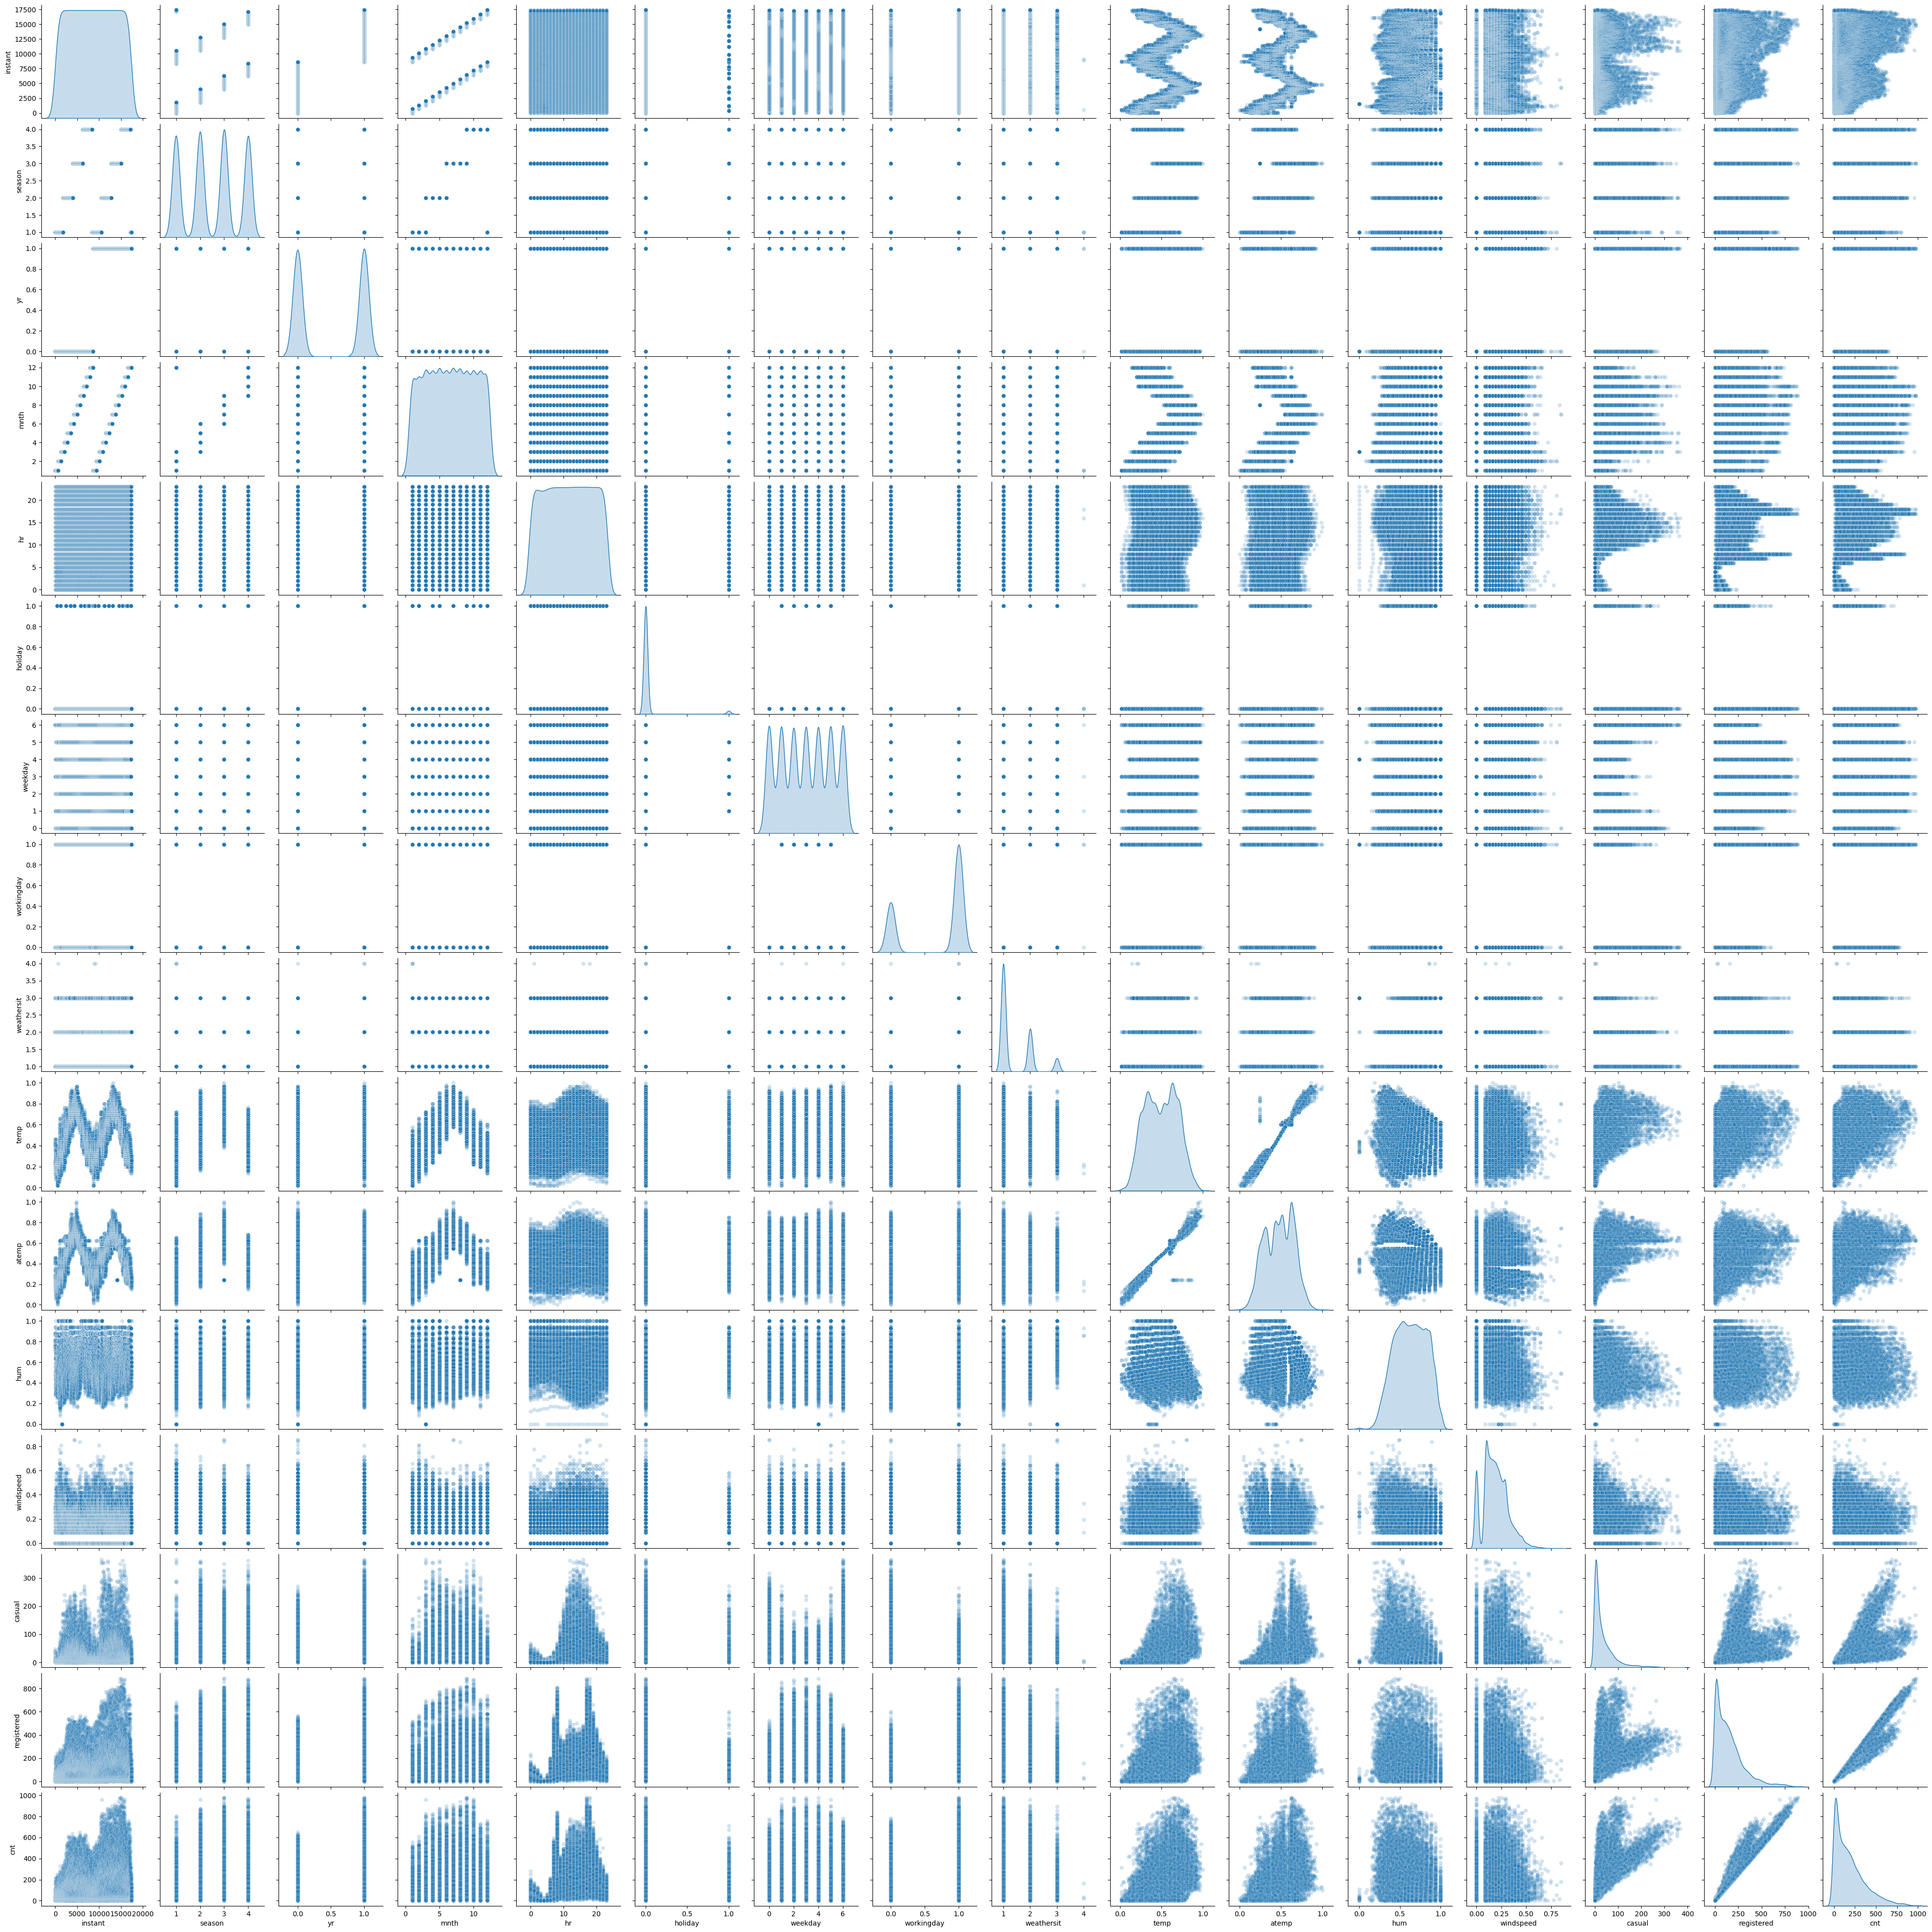

In [5]:
sns.pairplot(bike_df,diag_kind="kde",plot_kws={"alpha":0.2})

### 5) Prepare Bike of data

In [37]:
cate_val = ["Date"]
nume_val = ["instant","season","yr","mnth","Time","holiday","weekday","workingday","weathersit","temp","atemp","registered","hum",
            "windspeed","casual"]

#Prepare data

prepro = ColumnTransformer(
    transformers = [
        ("cat", OneHotEncoder(handle_unknown="ignore"),cate_val),
        ("num",RobustScaler(),nume_val)

    ]
        )

# Create the pipeline
pipeline_bike = Pipeline(steps=[
    ("preprocessor", prepro),
    ("model", LinearRegression())
])


### 6) Training and Test Bike data

In [39]:
X = bike_df[cate_val+nume_val]
y=bike_df["cnt"]

In [41]:
X_train,X_test,y_train,y_test = train_test_split(X, y ,test_size = 0.2, random_state = 42)

pipeline_bike.fit(X_train,y_train)


y_pred = pipeline_bike.predict(X_test)

mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test,y_pred)

print("The 5 first predictions",y_pred[5:])
print("R-squarred is:",r2)
print("Mean Squarred Error is:",mse)
print("Mean Absolute Error is:",mae)

The 5 first predictions [ 31.99958913 706.00145531  25.99949978 ...  98.00061496 266.00028814
 266.99996431]
R-squarred is: 0.9999999999907169
Mean Squarred Error is: 2.9395564833137454e-07
Mean Absolute Error is: 0.00042370001789116354


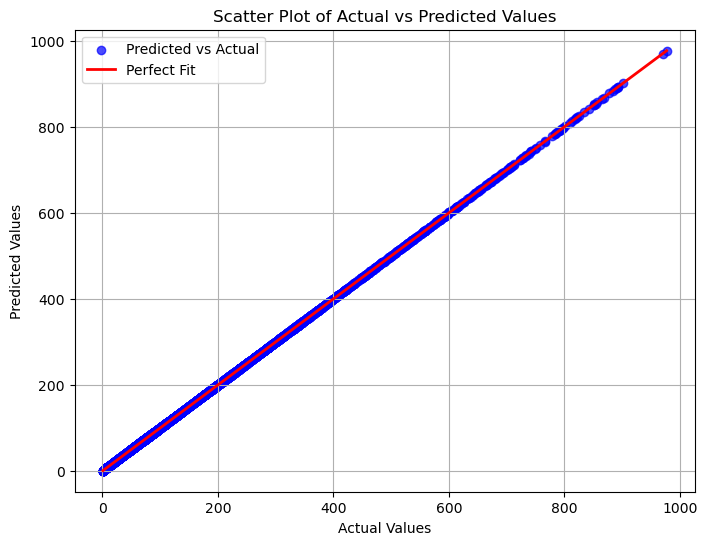

In [107]:
# Creating a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue', label="Predicted vs Actual")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label="Perfect Fit")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Scatter Plot of Actual vs Predicted Values")
plt.legend()
plt.grid(True)
plt.show()

### 7) Regularization of bike data

In [43]:
# Apply preprocessing pipeline
X_train_transformed = prepro.fit_transform(X_train)
X_test_transformed = prepro.transform(X_test)

In [51]:
elastic_net = ElasticNet(alpha=0.5, l1_ratio =0.5)
elastic_net.fit(X_train_transformed, y_train)
y_ELS_pred = elastic_net.predict(X_test_transformed)

r2_els = r2_score(y_test,y_ELS_pred)
mse_els = mean_squared_error(y_test,y_ELS_pred)
mae_els =mean_absolute_error(y_test,y_ELS_pred)

print("R2 score :", r2_els)
print("mse : ",mse_els)
print("mae :",mae)
print("predictions :",y_ELS_pred[10:])

R2 score : 0.9462380672830892
mse :  1702.393713723888
mae : 0.00042370001789116354
predictions : [ 56.98078294 124.74202165 533.43793543 ...  84.25962732 266.33619641
 236.63945558]


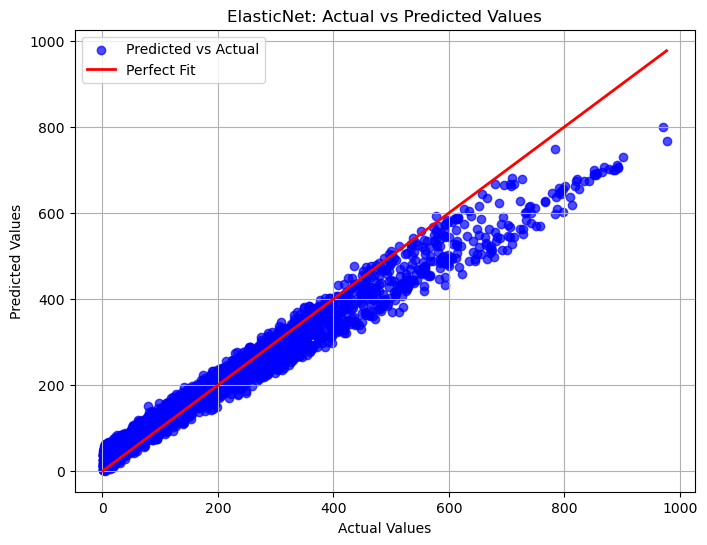

In [53]:
#Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_ELS_pred, alpha=0.7, color='blue', label="Predicted vs Actual")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label="Perfect Fit")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("ElasticNet: Actual vs Predicted Values")
plt.legend()
plt.grid(True)
plt.show()